<a href="https://colab.research.google.com/github/archi-singhal2023/Gold-Price-prediction/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing


In [ ]:
#loading csv data
gold_data = pd.read_csv('gld_price_data.csv')

In [ ]:
#print first 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#print last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
#some basic information about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking number of missing values
gold_data.isnull().sum()


,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
#getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
  1. Positive Correlation
  2. Negative Correlation

In [ ]:
correlation = gold_data.drop('Date', axis=1).corr()

<Axes: >

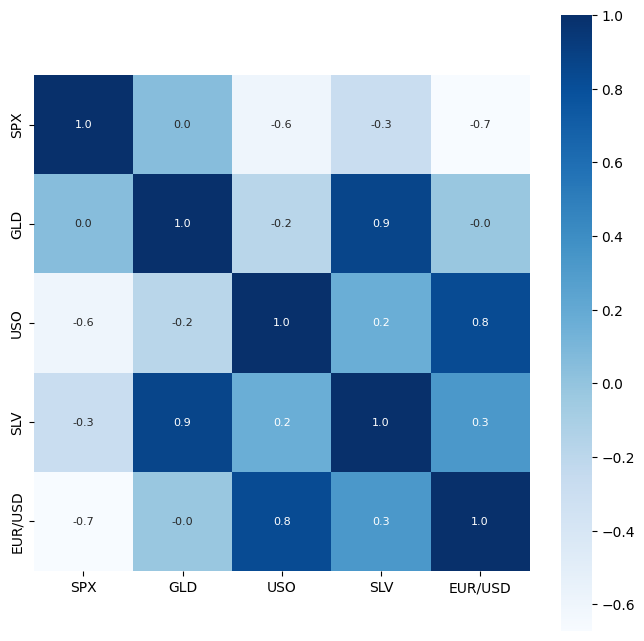

In [ ]:
#constructing heatmap to understand correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square = True, fmt = '.1f',annot = True, annot_kws = {'size':8}, cmap = "Blues")


In [ ]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-487358194.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

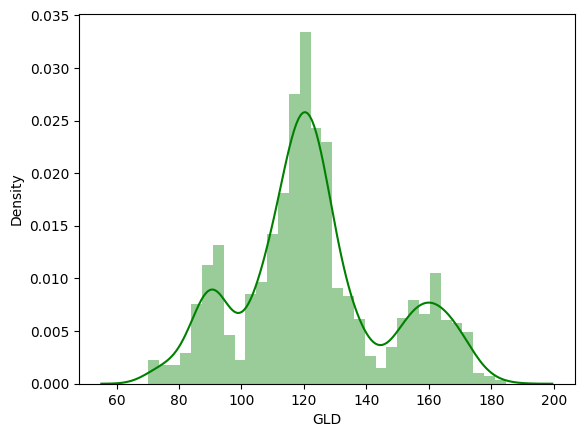

In [ ]:
# checking the distribution of the GLD price
sns.distplot(gold_data['GLD'], color='green')

Splitting the features and target


In [ ]:
X = gold_data.drop(['Date', 'GLD'],axis = 1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.2, random_state = 42)

Model Training Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
#training the model
regressor.fit(x_train, y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
#prediction on test data
test_data_prediction = regressor.predict(x_test)

In [ ]:
print(test_data_prediction)

[122.45289959 130.25260291 127.46569959  96.50029736 118.9286006
 114.40239916 124.84820155 117.74169949 107.86220115  97.98399996
  95.46119939 167.58339817 149.69260131 116.26980026 170.58470144
  85.34590016 123.15129905 109.33039725 113.17170051 131.51880301
 124.27109903 113.62300075 115.89160029 108.75049972 108.72150164
 125.88959899 119.1787999  112.3665992  113.35990138 125.51529887
 145.78830132  89.3546999  167.58779969 113.71339937 108.21240101
 120.14690119 141.25739871 161.23920188 173.857098   153.27560171
 119.24790118 113.42440073 121.36949923 113.56879933 121.98410024
 107.98950066  88.49399888 114.41129904 129.89300223 117.98300098
 103.64790034 129.81060216 107.08929859 160.42510413 132.0659005
 118.46329956 147.44770032 135.2595023   95.32590113 124.62430139
 115.0575988   85.97570072 104.2483992  113.72750005  84.12479921
 122.12740026 116.52219899 113.66900199 164.33460219  92.25420059
  80.16510094 160.86290061 159.40880252 106.76640019 149.04870151
 109.6161977

In [ ]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9902015809989476


#Compare actual values and predicted values in a plot

In [ ]:
Y_list = list(y_test)

In [ ]:
comparison_df = pd.DataFrame({'Actual Values': Y_list, 'Predicted Values': test_data_prediction})
display(comparison_df)

,Actual Values,Predicted Values
0,122.320000,122.452900
1,129.899994,130.252603
2,126.980003,127.465700
3,96.500000,96.500297
4,117.580002,118.928601
...,...,...
453,126.680000,123.713800
454,167.179993,169.329497
455,93.849998,93.779999
456,96.230003,96.202701


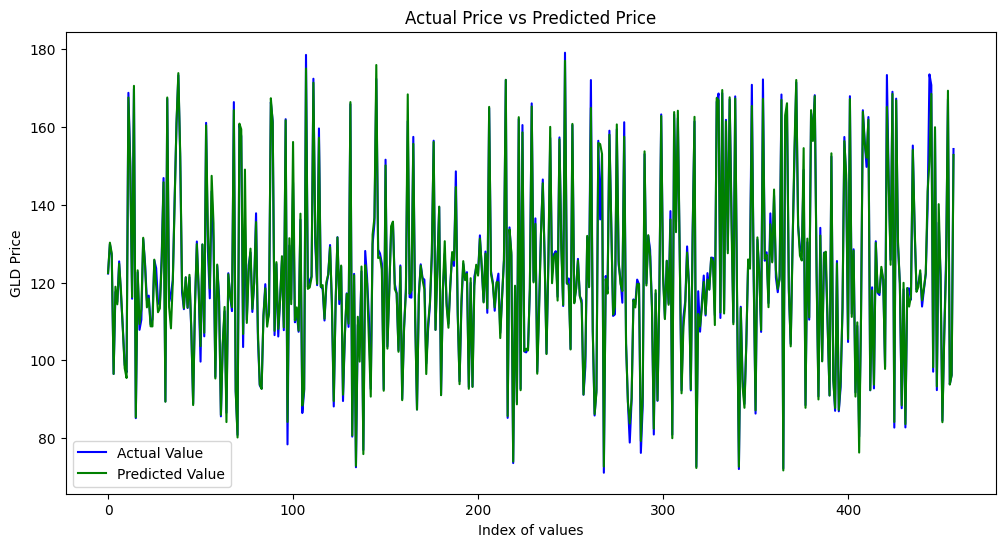

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(Y_list, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Index of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()